# Notebook Synopsis:

- Analyze data to determine how much images can be cropped
- 

In [43]:
import utils.hgg_utils as hu
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

### Determine how many slices do not provide any useful information

If the total sum of all values in a slice is 0, the entire slice could be dropped to save space. This would be any
slice that is completely black (first several and last several from every brain volume).

In [32]:
# Grab all of the paths to patient brain volumes
patients = hu.get_each_hgg_folder()
len(patients)

259

#### Using single patient as example...
The shape of the multimodal tensor is [240, 240, 155, 4] (pixel height, pixel width, slice id, modality).

In [33]:
example = hu.get_a_multimodal_tensor(patients[0])

The first slice should sum up to 0 and a slice somewhere in the middle should sum to be greater than 0.

In [37]:
print("Sum of all pixel values across all modalities at slice 0: ", np.sum(example[:, :, 0, :]))
print("Sum of all pixel values across all modalities at slice 80: ", np.sum(example[:, :, 80, :]))

Sum of all pixel values across all modalities at slice 0:  0.0
Sum of all pixel values across all modalities at slice 80:  32235912.0


#### Now across all slices

In [39]:
total_slice_pixel_value = []
for i in range(155):
    total_slice_pixel_value.append(np.sum(example[:, :, i, :]))
    
print(len(total_slice_pixel_value))
print(total_slice_pixel_value)

155
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 439320.0, 3090468.0, 3725616.0, 4195588.0, 4520144.0, 4895868.0, 5244224.0, 5620248.0, 5980032.0, 6339011.0, 6669441.0, 6976719.0, 7245903.0, 7515071.0, 7759279.0, 7988900.0, 8316932.0, 8605128.0, 9239795.0, 9726985.0, 10284045.0, 10776341.0, 11236091.0, 11780340.0, 12599178.0, 13103014.0, 13579158.0, 14051397.0, 14672825.0, 15337857.0, 16232483.0, 16918470.0, 17903604.0, 18688408.0, 19546700.0, 20205672.0, 20879156.0, 21374996.0, 21948412.0, 22465670.0, 22980534.0, 23388080.0, 23843582.0, 24732328.0, 25531426.0, 26778540.0, 27479474.0, 28237028.0, 29080988.0, 29575008.0, 29940456.0, 30357416.0, 30651328.0, 31042434.0, 31471904.0, 31933734.0, 32355670.0, 32626676.0, 32850444.0, 32939470.0, 33046396.0, 33025268.0, 33028520.0, 33013944.0, 33040024.0, 32941154.0, 32854556.0, 32691524.0, 32556662.0, 32423146.0, 32235912.0, 31950444.0, 31627508.0, 31356262.0, 31143150.0, 30912228.0, 30694020.0, 30470374.0, 30196132.0, 29895172.0, 295035

##### Graph for visualization

<function matplotlib.pyplot.show(*args, **kw)>

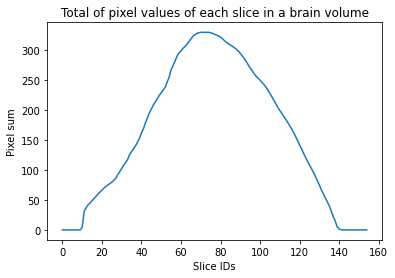

In [52]:
x = np.linspace(0, 154, 155)
# Dividing values by 100,000 for easier visual
y = np.array(total_slice_pixel_value)/100000

plt.plot(x, y)
plt.title('Total of pixel values of each slice in a brain volume')
plt.xlabel('Slice IDs')
plt.ylabel('Pixel sum (in 100ks)')
plt.show


#### It appears that roughly the first 10 and last 15 slices are completely black.

In [54]:
total_slice_pixel_value[:12]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 439320.0, 3090468.0]

In [55]:
total_slice_pixel_value[140:]

[163337.0,
 24796.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

First 10 and last 13 to be exact. Dropping 23 slices would leave us with 132 slices per a volume.
Which is about a 15% reduction in size. 

#### Next, calculate across all patient volumes to see if it holds true...


In [56]:
# Skipping patient at index 0 because we already have those values
# Adding values onto total_slice_pixel_values in their corresponding spots
for i in range(1, len(patients)):
    brain_volume = hu.get_a_multimodal_tensor(patients[i])
    for k in range(155):
        total_slice_pixel_value[k] =+ np.sum(brain_volume[:, :, k, :])
    

Honestly.... Taking longer than I expected 

Two full minutes later :D